# linear, polynomial and ridge regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Medical_insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


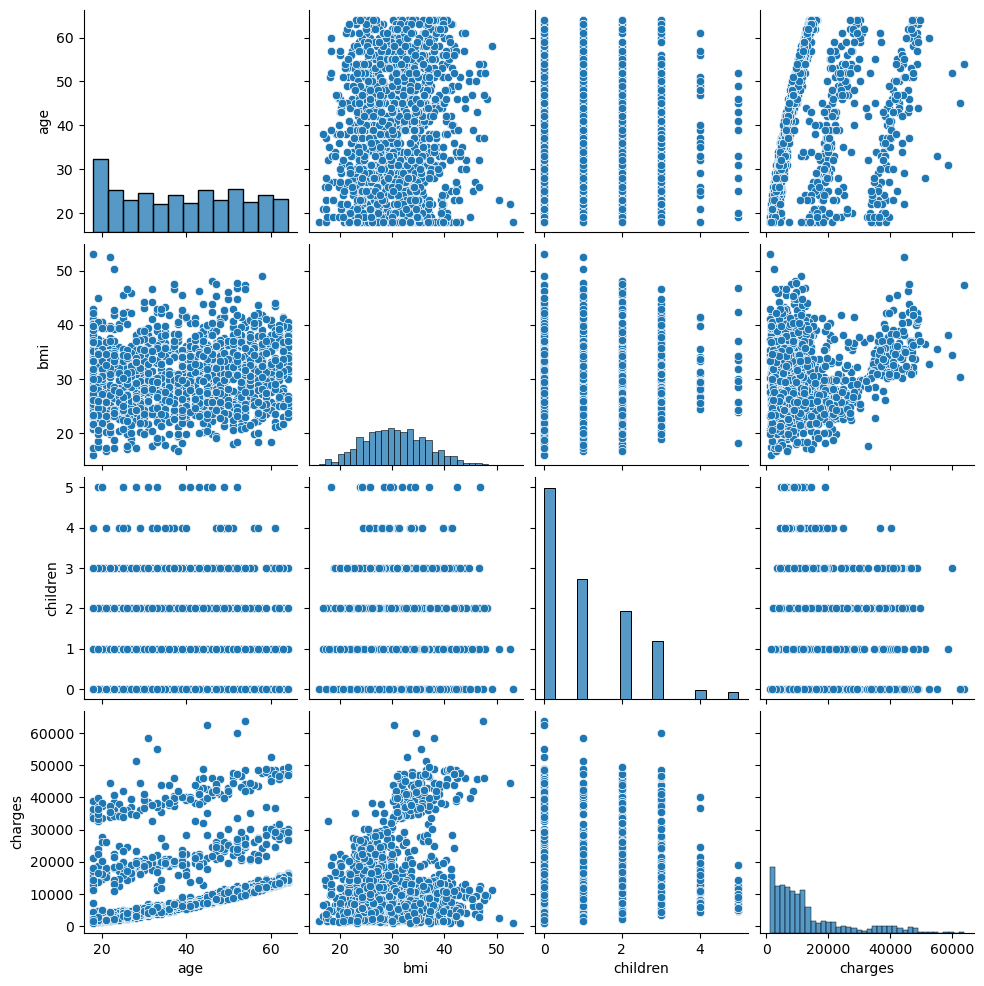

In [6]:
sns.pairplot(data = df)

In [7]:
bins = pd.get_dummies(df["smoker"])

In [8]:
df[["no_smoking", "smoking"]] = bins

In [9]:
df = df.drop("smoker", axis=1)

In [10]:
df.head()

,age,sex,bmi,children,region,charges,no_smoking,smoking
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


<Axes: xlabel='age', ylabel='Count'>

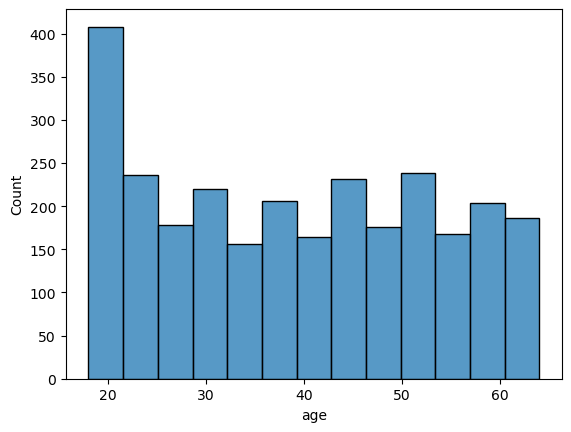

In [11]:
sns.histplot(df["age"])

<Axes: xlabel='bmi', ylabel='charges'>

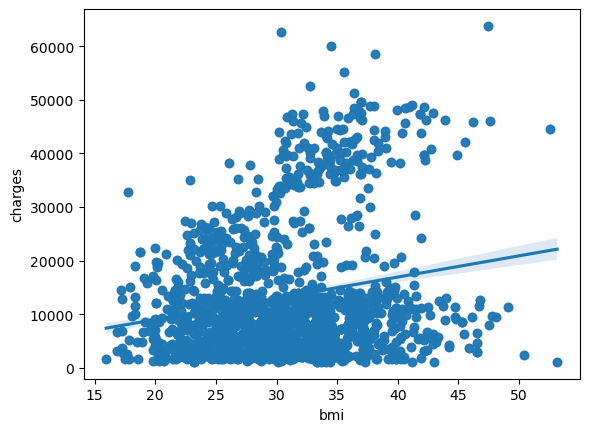

In [12]:
sns.regplot(x = "bmi", y = "charges", data = df)

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'region', 'charges', 'no_smoking',
       'smoking'],
      dtype='object')

In [14]:
X = df[["age", "sex", "bmi", "children", "region", "no_smoking", "smoking"]]
Y = df[["charges"]]

In [15]:
print(X.shape)
print(Y.shape)

(2772, 7)
(2772, 1)


# train-test-split(80-20)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2217, 7)
(2217, 1)
(555, 7)
(555, 1)


# linear regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [20]:
x_train = x_train.drop("sex", axis=1)

In [21]:
x_train = x_train.drop("region", axis = 1)

In [22]:
x_test = x_test.drop("sex", axis = 1)

In [23]:
x_test = x_test.drop("region", axis = 1)

In [24]:
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
reg.score(x_train, y_train)

0.7505297075354489

In [26]:
reg.score(x_test, y_test)

0.7451158644467866

In [27]:
predictions1 = reg.predict(x_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\4089559597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["charges"], hist = False, color = "r", label = "Actual Values")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\4089559597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

<Axes: xlabel='charges', ylabel='Density'>

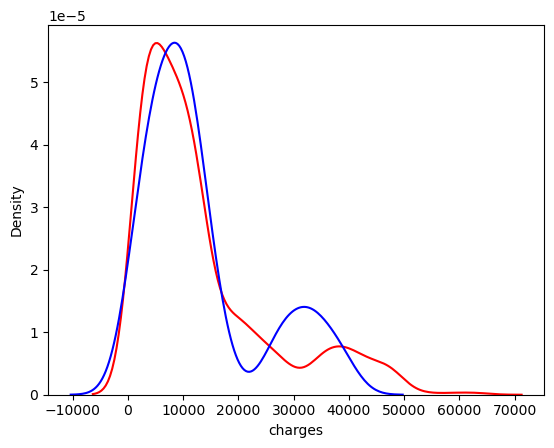

In [28]:
ax1 = sns.distplot(df["charges"], hist = False, color = "r", label = "Actual Values")
sns.distplot(predictions1, ax=ax1, hist = False, color = "b", label = "Fitted Values")

# polynomial regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [30]:
x_train_poly = poly.fit_transform(x_train)

In [31]:
reg.fit(x_train_poly, y_train)

LinearRegression()

In [32]:
reg.score(x_train_poly, y_train)

0.8430683263740237

In [33]:
x_test_poly = poly.transform(x_test)

In [34]:
reg.score(x_test_poly, y_test)

0.8403436515839261

In [35]:
predictions2 = reg.predict(x_test_poly)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\2832557564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["charges"], hist = False, color = "r", label = "Actual Values")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\2832557564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

<Axes: xlabel='charges', ylabel='Density'>

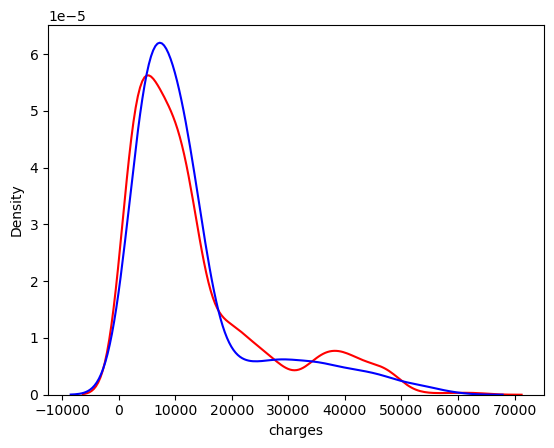

In [36]:
ax1 = sns.distplot(df["charges"], hist = False, color = "r", label = "Actual Values")
sns.distplot(predictions2, ax=ax1, hist = False, color = "b", label = "Fitted Values")

# ridge regression using gridsearchcv to find the best value for parameter alpha

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
polyreg = make_pipeline(PolynomialFeatures(), StandardScaler(), LinearRegression())

In [39]:
parameters1 = {"polynomialfeatures__degree":[1,2,3,4]}

In [40]:
grid_search = GridSearchCV(polyreg, parameters1, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]})

In [41]:
grid_search.best_params_

{'polynomialfeatures__degree': 2}

In [42]:
grid_search.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [43]:
grid_search.best_score_

0.8403399908884837

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridgereg = make_pipeline(StandardScaler(), Ridge())

In [46]:
parameters2 = {"ridge__alpha":[1e-15,1e-5,1e-2,0.001,0.01,0.1,1,10,100,1000,10000]}

In [47]:
grid_search_ridge = GridSearchCV(ridgereg, parameters2, cv = 5)

In [48]:
grid_search_ridge.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1e-15, 1e-05, 0.01, 0.001, 0.01, 0.1,
                                          1, 10, 100, 1000, 10000]})

In [49]:
grid_search_ridge.best_params_

{'ridge__alpha': 10}

In [50]:
grid_search_ridge.best_score_

0.7480389972230318

In [51]:
grid_search_ridge.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

# conclusion-From applying polynomial regression we get the best results